# Ödev Konusu:  Classification of Coronary Artery Disease veri setinin Ön İşleme Keşifsel Veri Analizi ve Eğitimi
**Öğrenci Numarası**: Y245012006  
**Öğrenci Adı Soyadı**: Aleyna Barut  
**Kullanılan Veri Kümesi**: [Veri Kümesi Linki](https://www.kaggle.com/datasets/saeedeheydarian/classification-of-coronary-artery-disease)  


                                                    Classification of Coronary Artery Disease                                         

ÖN İŞLEME VE KEŞİFSEL VERİ ANALİZİ İŞLEMLERİ

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Grafiklerin notebook içerisinde görüntülenmesi için
%matplotlib inline


Gerekli kütüphaneler eklendi.

In [3]:
# Veriyi yükleme 
datafm = pd.read_csv("C:/Users/aleyn/Desktop/YapayZeka/data/CAD.csv")

# İlk 5 satırı görüntüle
datafm.head()


,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


Bu kod bloğunda, pd.read_csv fonksiyonu kullanılarak belirtilen dosya yolundan CAD.csv dosyası yüklenir ve bir pandas DataFrame'ine dönüştürülür. Bu, veriyi tablo yapısında saklamak için gereklidir. Ardından head() metodu çağrılarak veri çerçevesinin ilk 5 satırı görüntülenir. Bu işlem veri setindeki sütun adlarını ve ilk birkaç değeri kontrol ederek veri yapısını anlamayı sağlar.

In [4]:
# Veri kümesi hakkında genel bilgi
datafm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

datafm.info() fonksiyonu çağrılarak veri çerçevesi içindeki sütunların adları, veri türleri, toplam sütun ve satır sayısı ile birlikte her bir sütundaki eksik veri sayısı ve bellekte kapladığı yer gibi bilgiler görüntülenir. Bu işlem, veri setinin yapısını ve eksik değer olup olmadığını hızlıca analiz etmek için kullanılır.

In [5]:
#isna null degerleri goruntulenir true null 
datafm.isna() 

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


datafm.isna() fonksiyonu, veri kümesindeki her bir hücrenin boş veya eksik bir değer içerip içermediğini kontrol eder. Eğer bir hücrede eksik veri (NaN veya None) varsa bu hücre için True döner aksi takdirde False döner.

In [6]:
# Eksik değerlerin kontrolü
datafm.isna().sum()


Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
F

Bu kod veri kümesindeki her bir sütun için eksik (null) değerlerin toplam sayısını döndürür.

In [7]:

print(f'There are {datafm.duplicated().sum()} duplicates in the dataset')

There are 0 duplicates in the dataset


Bu kod, veri kümesindeki tekrarlanan (duplicate) satırları kontrol eder ve bunların sayısını gösterir. datafm.duplicated() fonksiyonu her satırı bir öncekiyle karşılaştırarak tekrarlanan satırlarda True döndürür ve benzersiz satırlarda False döndürür. Ardından .sum() fonksiyonu, True olan (yani tekrarlanan) satırları toplar. Sonuç olarak veri kümesinde kaç tane tekrarlanan satır olduğunu gösteren bir sayıyı elde ederiz.

In [8]:
# Numerical variables:
num_cols = ['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE']

# Categorical variables:
cat_cols = ['Sex', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion', 'LVH', 'Poor R Progression', 'Cath']

# Ordinal variables
ord_cols = ['Function Class', "Region RWMA", "VHD"]

print(f"Total Numerical features = {len(num_cols)}")
print(' ')
print(f"Total Categorical features = {len(cat_cols)}")
print(' ')
print(f"Total Ordinal features = {len(ord_cols)}")


Total Numerical features = 21
 
Total Categorical features = 31
 
Total Ordinal features = 3


Bu kodda veri kümesindeki sayısal (numerical), kategorik (categorical) ve ordinal (sıralı) değişkenler sınıflandırılmaktadır.Kodun sonunda ise her bir değişken türü için toplam sayılar yazdırılmaktadır.

In [9]:
print(f"[Unique Values in {len(ord_cols)} Ordinal Variables]\n")

for ord_col in ord_cols:
    print("* {} : {} Unique Values =>".format(ord_col, datafm[ord_col].nunique()), datafm[ord_col].unique())

[Unique Values in 3 Ordinal Variables]

* Function Class : 4 Unique Values => [0 3 2 1]
* Region RWMA : 5 Unique Values => [0 4 2 3 1]
* VHD : 4 Unique Values => ['N' 'mild' 'Severe' 'Moderate']



Bu kod parçasında sıralı (ordinal) değişkenlerin her birinde kaç tane benzersiz değer olduğu kontrol edilir ve bu benzersiz değerleri yazdırılır.

In [10]:
print(f"[Unique Values in {len(num_cols)} Numerical Variables]\n")

for num_col in num_cols:
    print("* {} : {} Unique Values".format(num_col, datafm[num_col].nunique()))

[Unique Values in 21 Numerical Variables]

* Age : 46 Unique Values
* Weight : 54 Unique Values
* Length : 44 Unique Values
* BMI : 262 Unique Values
* BP : 17 Unique Values
* PR : 21 Unique Values
* FBS : 113 Unique Values
* CR : 18 Unique Values
* TG : 147 Unique Values
* LDL : 110 Unique Values
* HDL : 47 Unique Values
* BUN : 33 Unique Values
* ESR : 58 Unique Values
* HB : 66 Unique Values
* K : 27 Unique Values
* Na : 25 Unique Values
* WBC : 78 Unique Values
* Lymph : 50 Unique Values
* Neut : 52 Unique Values
* PLT : 135 Unique Values
* EF-TTE : 11 Unique Values


Sayısal (numeric) değişkenlerin her birinde kaç tane benzersiz değer olduğu kontrol edilir ve bu benzersiz değerleri yazdırılır.

In [11]:

print(f"[Unique Values in {len(cat_cols)} Categorical Variables]\n")

for cat_col in cat_cols:
    print("* {} : {} Unique Values =>".format(cat_col, datafm[cat_col].nunique()), datafm[cat_col].unique())

[Unique Values in 31 Categorical Variables]

* Sex : 2 Unique Values => ['Male' 'Fmale']
* DM : 2 Unique Values => [0 1]
* HTN : 2 Unique Values => [1 0]
* Current Smoker : 2 Unique Values => [1 0]
* EX-Smoker : 2 Unique Values => [0 1]
* FH : 2 Unique Values => [0 1]
* Obesity : 2 Unique Values => ['Y' 'N']
* CRF : 2 Unique Values => ['N' 'Y']
* CVA : 2 Unique Values => ['N' 'Y']
* Airway disease : 2 Unique Values => ['N' 'Y']
* Thyroid Disease : 2 Unique Values => ['N' 'Y']
* CHF : 2 Unique Values => ['N' 'Y']
* DLP : 2 Unique Values => ['Y' 'N']
* Edema : 2 Unique Values => [0 1]
* Weak Peripheral Pulse : 2 Unique Values => ['N' 'Y']
* Lung rales : 2 Unique Values => ['N' 'Y']
* Systolic Murmur : 2 Unique Values => ['N' 'Y']
* Diastolic Murmur : 2 Unique Values => ['N' 'Y']
* Typical Chest Pain : 2 Unique Values => [0 1]
* Dyspnea : 2 Unique Values => ['N' 'Y']
* Atypical : 2 Unique Values => ['N' 'Y']
* Nonanginal : 2 Unique Values => ['N' 'Y']
* Exertional CP : 1 Unique Values => 

Kategorik (categorical) değişkenlerin her birinde kaç tane benzersiz değer olduğu kontrol edilir ve bu benzersiz değerleri yazdırılır.

In [25]:
# VHD ve Sex sütunlarını güncelleme
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
datafm['VHD'] = datafm['VHD'].replace({"N": 0, "mild": 1, "Moderate": 2, "Severe": 3}).astype(int)
datafm['Sex'] = datafm['Sex'].replace({"Fmale": "Female"})

# N ve Y değerlerini değiştirme
datafm.replace({'N': 0, 'Y': 1}, inplace=True)


Bu kodda VHD sütunundaki kategorik değerler sayısal değerlere (0, 1, 2, 3) dönüştürülür. Sex sütunundaki yazım hatası olan "Fmale" değeri "Female" olarak düzeltilir. Son olarak tüm veri kümesindeki 'N' değerleri 0, 'Y' değerleri ise 1 olarak değiştirilir. Bu, veriyi sayısal hale getirerek modelleme için uygun hale getirir.

In [14]:
print(f"[Unique Values in {len(cat_cols)} Categorical Variables]\n")

for cat_col in cat_cols:
    print("* {} : {} Unique Values =>".format(cat_col, datafm[cat_col].nunique()), datafm[cat_col].unique())

[Unique Values in 31 Categorical Variables]

* Sex : 2 Unique Values => ['Male' 'Female']
* DM : 2 Unique Values => [0 1]
* HTN : 2 Unique Values => [1 0]
* Current Smoker : 2 Unique Values => [1 0]
* EX-Smoker : 2 Unique Values => [0 1]
* FH : 2 Unique Values => [0 1]
* Obesity : 2 Unique Values => [1 0]
* CRF : 2 Unique Values => [0 1]
* CVA : 2 Unique Values => [0 1]
* Airway disease : 2 Unique Values => [0 1]
* Thyroid Disease : 2 Unique Values => [0 1]
* CHF : 2 Unique Values => [0 1]
* DLP : 2 Unique Values => [1 0]
* Edema : 2 Unique Values => [0 1]
* Weak Peripheral Pulse : 2 Unique Values => [0 1]
* Lung rales : 2 Unique Values => [0 1]
* Systolic Murmur : 2 Unique Values => [0 1]
* Diastolic Murmur : 2 Unique Values => [0 1]
* Typical Chest Pain : 2 Unique Values => [0 1]
* Dyspnea : 2 Unique Values => [0 1]
* Atypical : 2 Unique Values => [0 1]
* Nonanginal : 2 Unique Values => [0 1]
* Exertional CP : 1 Unique Values => [0]
* LowTH Ang : 2 Unique Values => [0 1]
* Q Wave : 2

Değişiklikler kontrol edilir.

In [15]:
print(f"[Unique Values in {len(ord_cols)} Ordinal Variables]\n")

for ord_col in ord_cols:
    print("* {} : {} Unique Values =>".format(ord_col, datafm[ord_col].nunique()), datafm[ord_col].unique())

[Unique Values in 3 Ordinal Variables]

* Function Class : 4 Unique Values => [0 3 2 1]
* Region RWMA : 5 Unique Values => [0 4 2 3 1]
* VHD : 4 Unique Values => [0 1 3 2]


Değişiklikler kontrol edilir.

In [16]:
datafm[num_cols].describe(percentiles=[0.1, 0.25, 0.75, 0.9, 0.95])

,Age,Weight,Length,BMI,BP,PR,FBS,CR,TG,LDL,...,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,129.554455,75.141914,119.184818,1.055611,150.343234,104.643564,...,17.501650,19.462046,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023
std,10.392278,11.987358,9.327661,4.098865,18.938105,8.911801,52.079653,0.264296,97.959451,35.396688,...,6.956761,15.936475,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194
min,30.000000,48.000000,140.000000,18.115413,90.000000,50.000000,62.000000,0.500000,37.000000,18.000000,...,6.000000,1.000000,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000
10%,47.000000,60.000000,152.000000,22.338318,110.000000,70.000000,80.000000,0.800000,76.000000,65.200000,...,11.000000,4.000000,11.000000,3.700000,137.000000,5100.000000,19.000000,49.000000,170.000000,35.000000
25%,51.000000,65.000000,158.000000,24.514380,120.000000,70.000000,88.500000,0.900000,90.000000,80.000000,...,13.000000,9.000000,12.200000,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000
50%,58.000000,74.000000,165.000000,26.775510,130.000000,70.000000,98.000000,1.000000,122.000000,100.000000,...,16.000000,15.000000,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000
75%,66.000000,81.000000,171.000000,29.411765,140.000000,80.000000,130.000000,1.200000,177.000000,122.000000,...,20.000000,26.000000,14.200000,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000
90%,73.000000,89.000000,176.000000,33.105234,160.000000,85.800000,191.800000,1.400000,250.000000,152.800000,...,25.000000,41.000000,15.080000,4.800000,145.000000,10400.000000,44.000000,72.800000,292.800000,55.000000
95%,76.000000,93.900000,179.000000,34.805948,160.000000,90.000000,218.900000,1.500000,308.600000,169.800000,...,31.000000,51.000000,15.600000,4.990000,146.900000,12100.000000,49.000000,78.000000,330.000000,55.000000


Bu kod num_cols listesinde belirtilen sayısal sütunların temel istatistiksel özetini hesaplar ve ek olarak belirtilen persentil değerlerini (0.1, 0.25, 0.75, 0.9, 0.95) dahil eder. Verinin dağılımı hakkında detaylı bilgi verir.

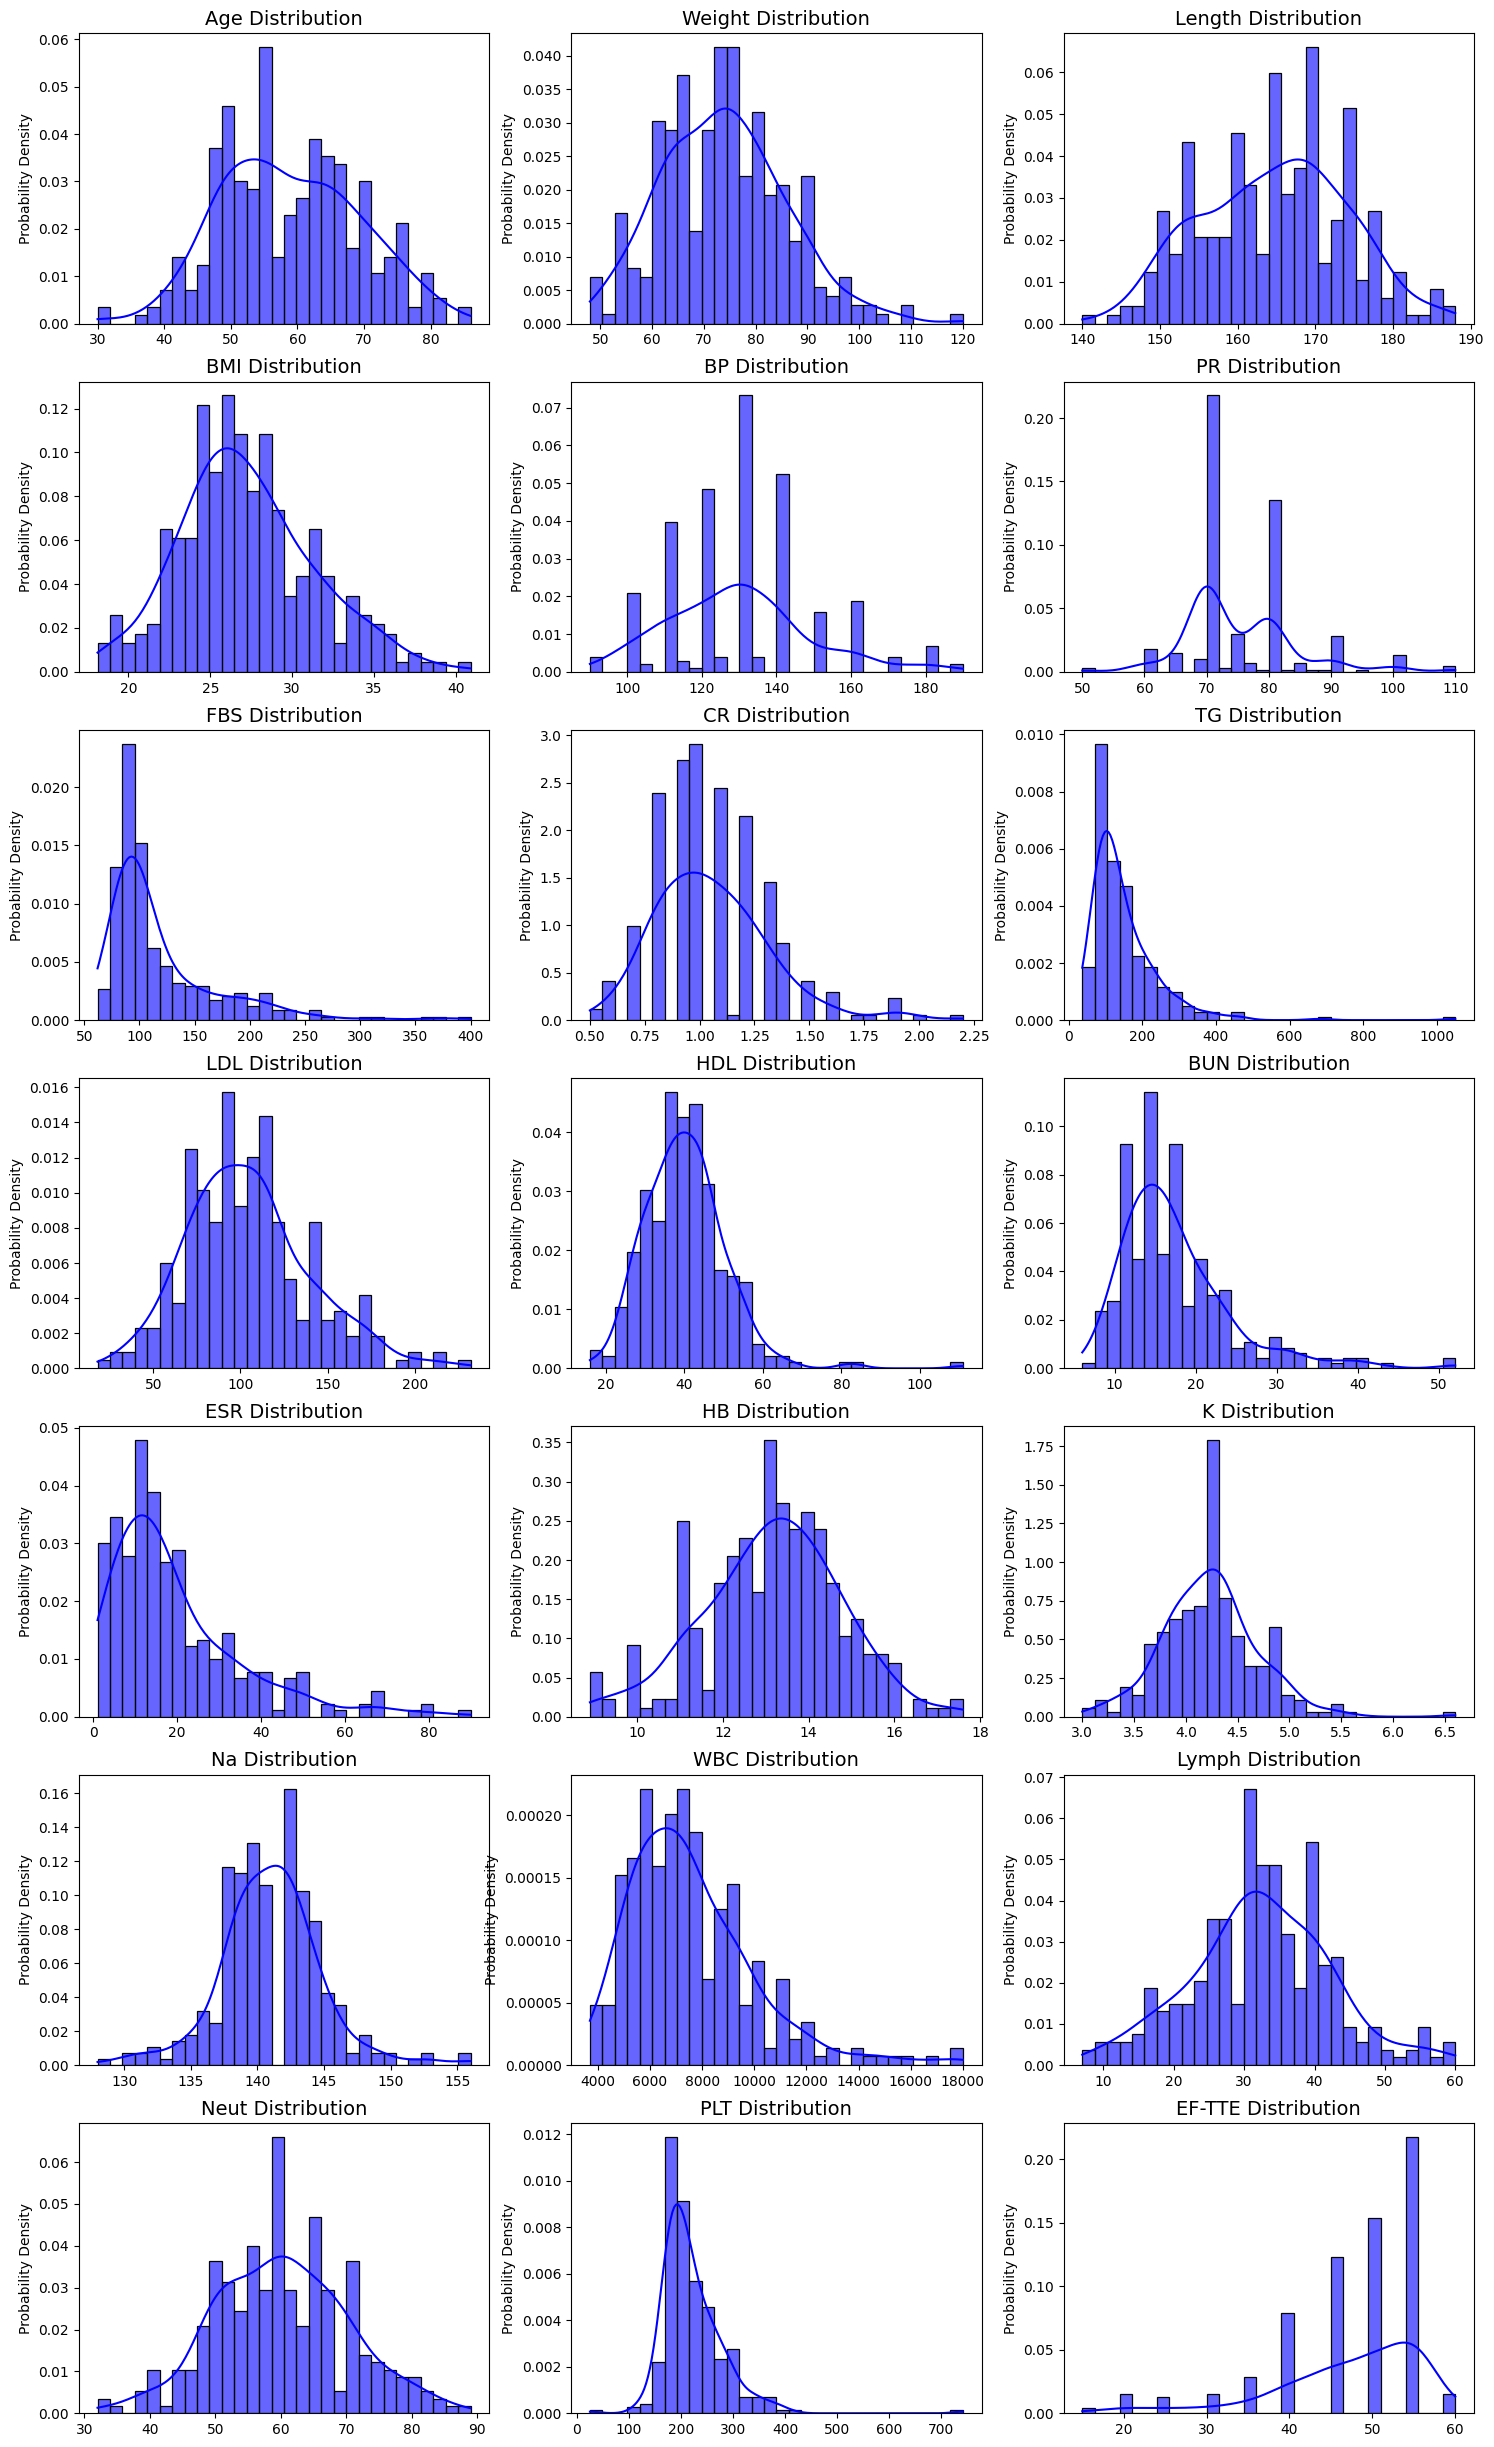

In [17]:

## Histogramlar ile sayısal değişkenlerin dağılımını görselleştirme
n_rows, n_cols = 7, 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(18, 20))

for i, num_col in enumerate(num_cols):
    row, col = i // n_cols, i % n_cols
    
    # Histogram ve KDE grafiklerini çiz
    sns.histplot(datafm[num_col], bins=30, stat='density', ax=ax[row, col], kde=True, color='blue', alpha=0.6)
    
    ax[row, col].set_title(f'{num_col} Distribution', fontsize=14)
    ax[row, col].set_ylabel("Probability Density", fontsize="medium")
    ax[row, col].set_xlabel("")

fig.subplots_adjust(top=1.3)
plt.show()


Bu kod sayısal değişkenlerin (num_cols) dağılımlarını görselleştirmek için histogramlar ve KDE (Kernel Density Estimation) grafiklerini oluşturur.Bu grafikler her bir sayısal değişkenin veri setindeki dağılımını anlamanızı sağlar.

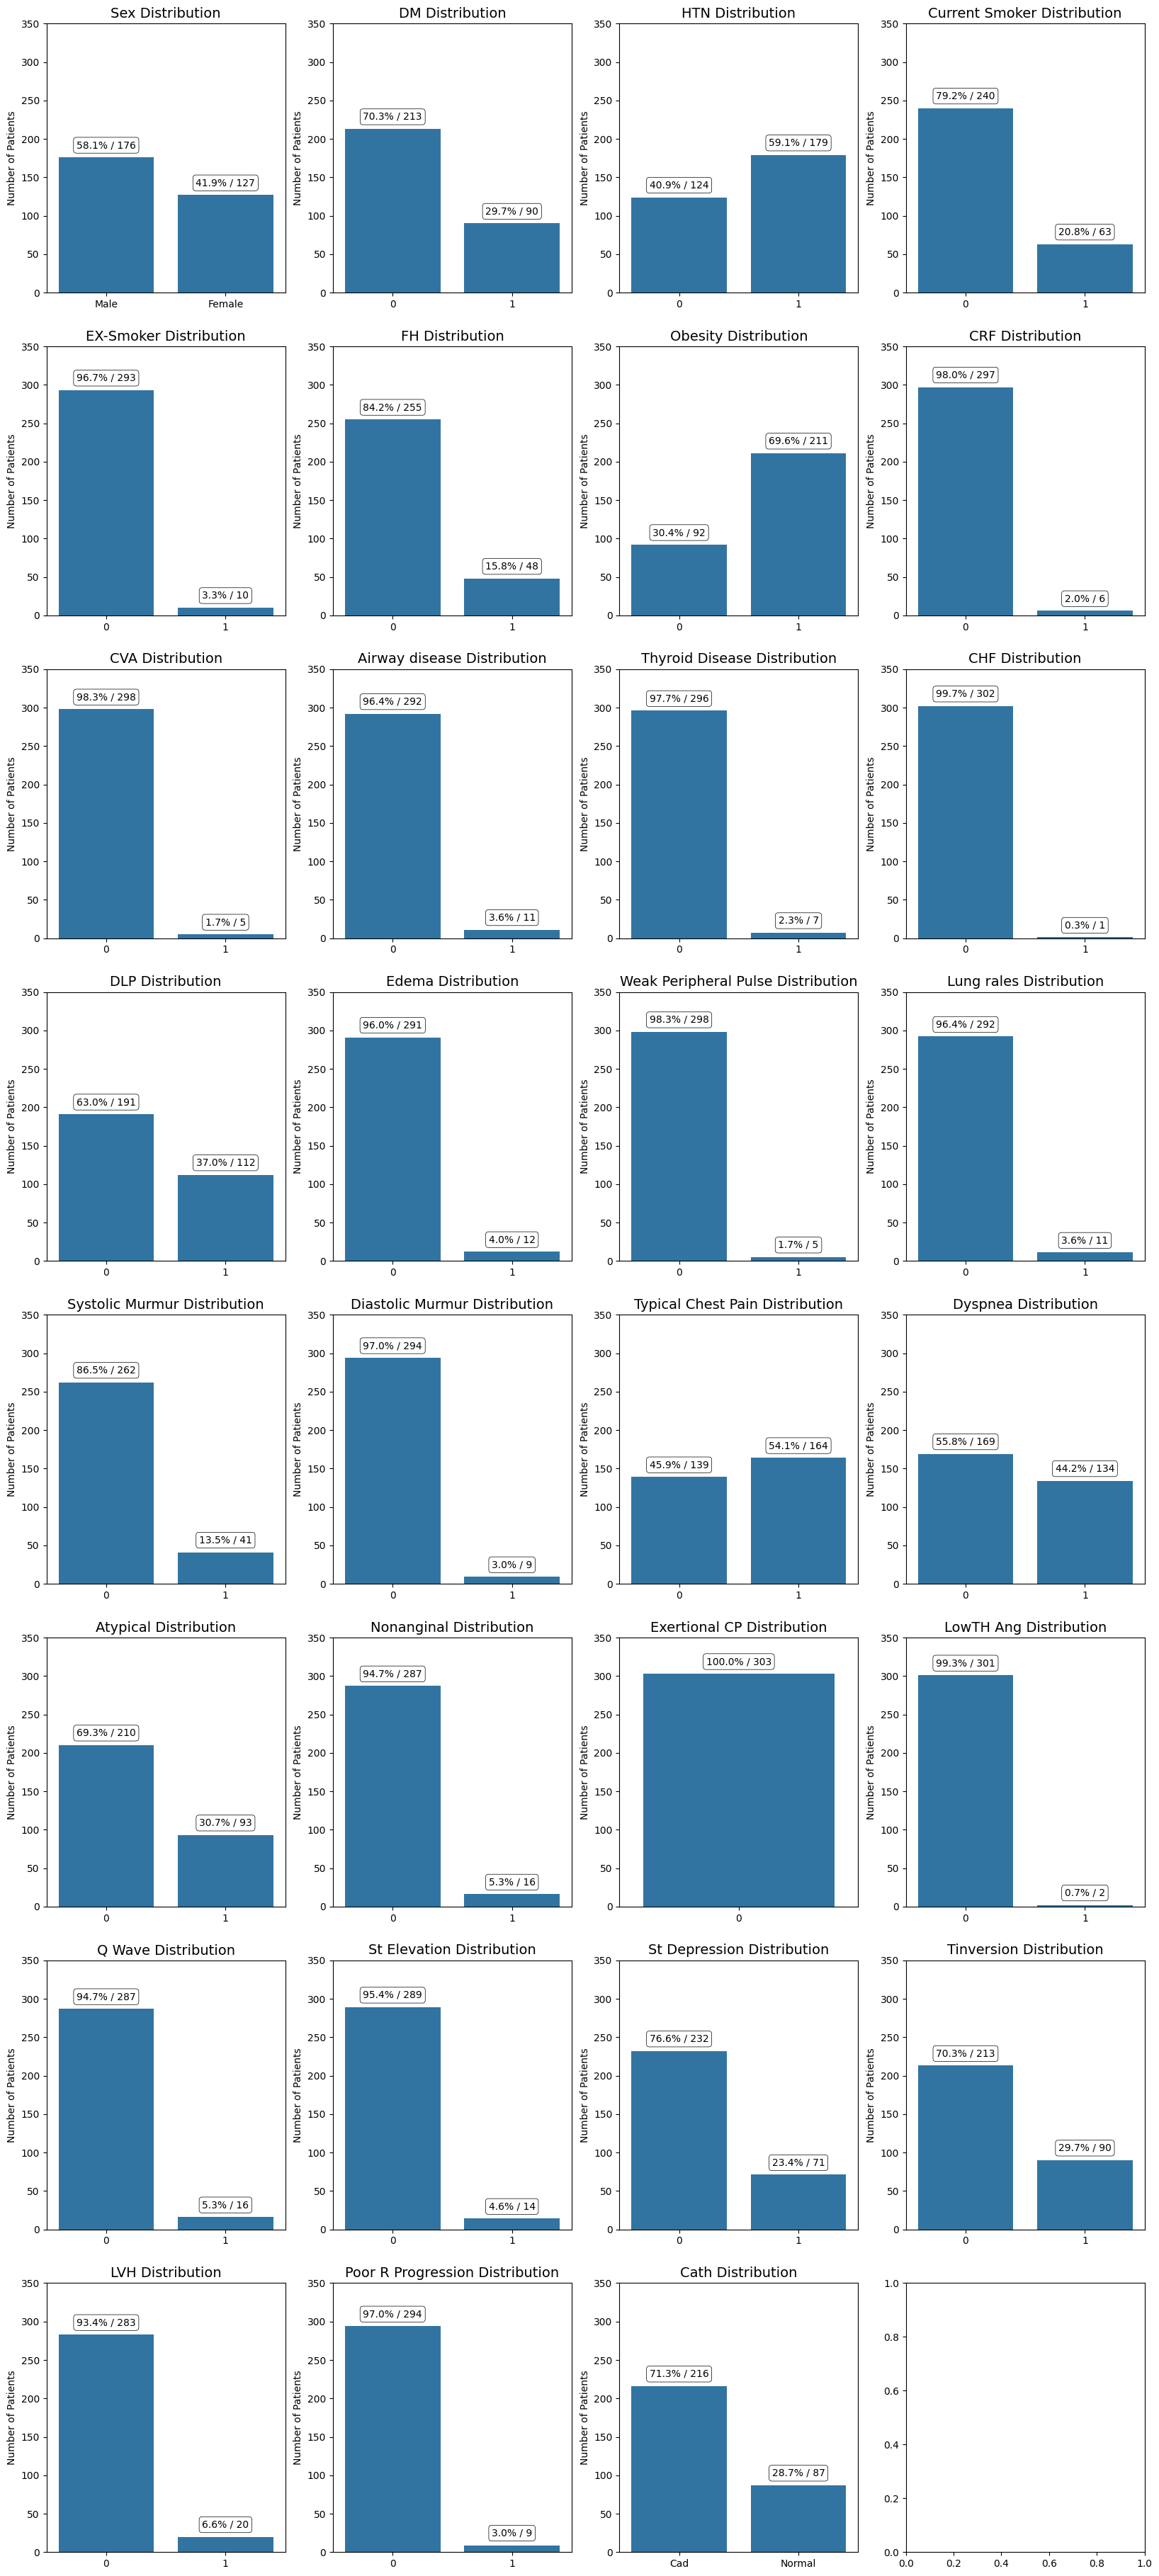

In [18]:

## Counplot ile kategorik değişkenlerin dağılımını görselleştirme
# Satır ve sütun sayısını ayarlama
n_rows, n_cols = 8, 4

# Figürü ve eksenleri oluşturma
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 30))

# Kategorik sütunlar üzerinde döngü
for i, cat_col in enumerate(cat_cols):
    # Hangi satır ve sütuna yerleştirileceğini hesaplama
    row, col = divmod(i, n_cols)
    
    # Countplot oluşturma
    rects = sns.countplot(x=cat_col, data=datafm, ax=ax[row, col])
    
    # Yükseklik değerlerini gösterme
    for rect in rects.patches:
        height = rect.get_height()
        ax[row, col].text(rect.get_x() + rect.get_width() / 2., height + 12,
                          "{:1.1f}% / {:d}".format(height / len(datafm) * 100, int(height)), 
                          ha='center', 
                          bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
    # Başlık ve etiketleri ayarlama
    ax[row, col].set_title(f'{cat_col} Distribution', fontsize=14)
    ax[row, col].set_xlabel("")
    ax[row, col].set_ylabel("Number of Patients")
    ax[row, col].set_ylim([0, 350])

# Alt boşlukları ayarlama
fig.subplots_adjust(top=1.3)
# Figürü gösterme
plt.show()




Kategorik değişkenlerin dağılımlarını görselleştirmek için her bir kategorik sütun (cat_cols) için bir countplot oluşturur.Tüm kategorik değişkenlerin görsel analizini yaparak her bir kategorinin veri setindeki dağılımını net bir şekilde gösterir.

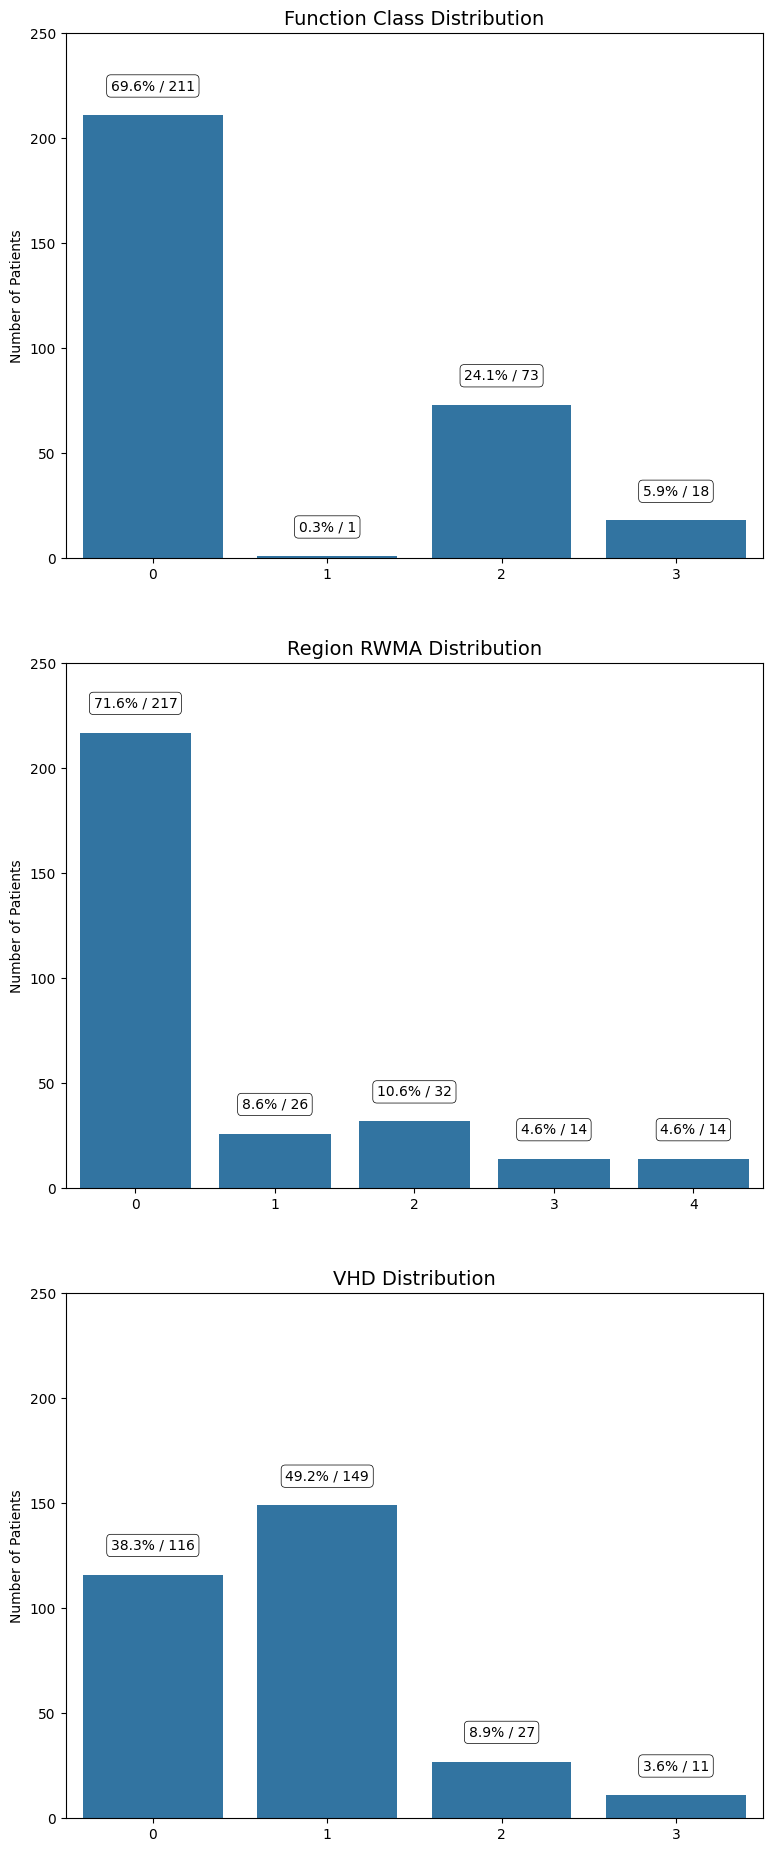

In [19]:
## Counplot ile sıralı değişkenlerin dağılımını görselleştirme

n_rows, n_cols = 3, 1
fig, ax = plt.subplots(n_rows, n_cols, figsize=(9, 15))
for i, ord_col in enumerate(ord_cols):
    rects = sns.countplot(x=ord_col, data=datafm, ax=ax[i])
    
    for rect in rects.patches:
        height = rect.get_height()
        ax[i].text(rect.get_x() + rect.get_width() / 2., height + 12,
                    "{:1.1f}% / {:d}".format(height / len(datafm) * 100, int(height)), 
                    ha='center', 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
    # Başlık ve etiketleri ayarlama
    ax[i].set_title(f'{ord_col} Distribution', fontsize=14)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("Number of Patients")
    ax[i].set_ylim([0, 250])
    
    # Eksen etiketlerini ayarlama
    if ord_col == 'Function_Class':
        ax[i].set_xticks([0, 1, 2, 3])
        ax[i].set_xticklabels(['NYHA Class 1', 'NYHA Class 2', 'NYHA Class 3', 'NYHA Class 4'])
    elif ord_col == 'Region_RWMA':
        ax[i].set_xticks([0, 1, 2, 3])
        ax[i].set_xticklabels(['Normal', 'Mild', 'Moderate', 'Severe'])

# Alt boşlukları ayarlama
fig.subplots_adjust(top=1.3)
# Figürü gösterme
plt.show()


Her ordinal değişkenin hasta sayısı ve yüzdesini içeren dağılımlarını görsel olarak sunan grafikler oluşturulur.

In [26]:
# 'Cath' ve 'Sex' sütunlarını sayısal hale çevirme
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
datafm['Cath'] = datafm['Cath'].replace({"Normal": 0, "Cad": 1}).astype(int)
datafm['Sex'] = datafm['Sex'].replace({"Female": 1, "Male": 0}).astype(int)

# Değişiklikleri kontrol etme
print("Unique values in 'Cath':", datafm['Cath'].unique())
print("Unique values in 'Sex':", datafm['Sex'].unique())


Unique values in 'Cath': [1 0]
Unique values in 'Sex': [0 1]


'Cath' ve 'Sex' sütunlarındaki kategorik veriler sayısal verilere dönüştürülür ve bu dönüşümlerin doğru yapıldığı kontrol edilir.

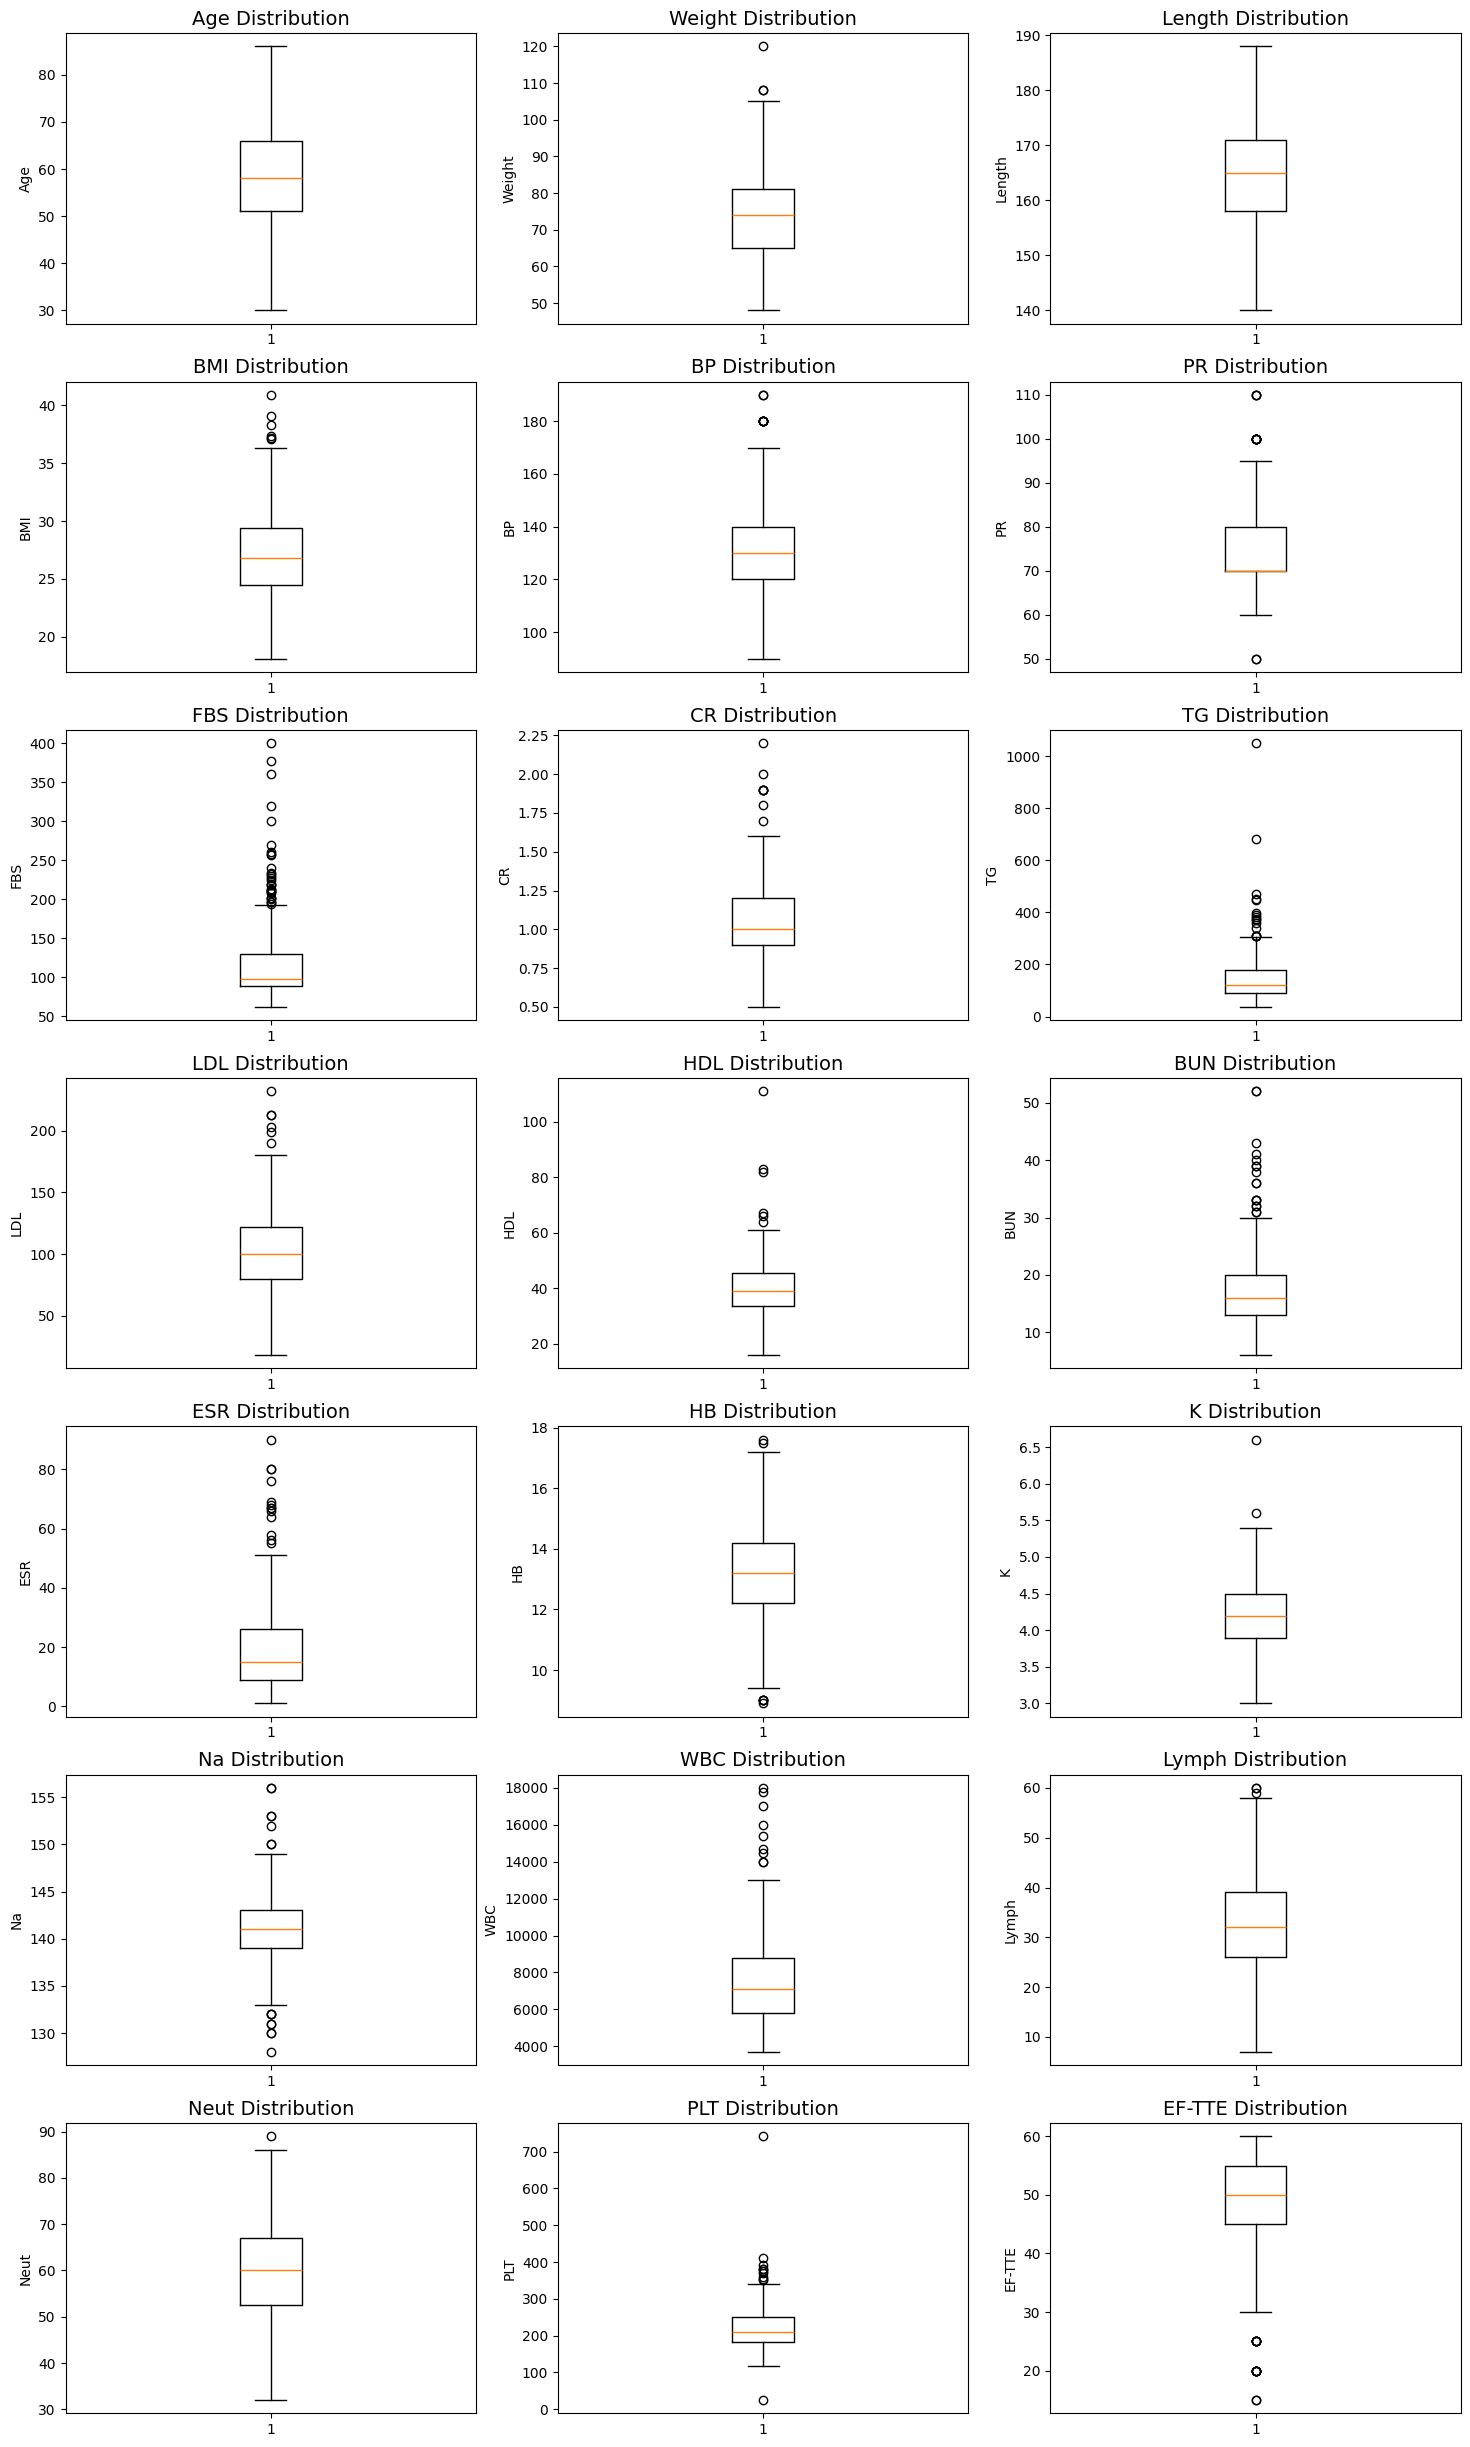

In [27]:
n_rows, n_cols = 7, 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(18,20))

for i, num_col in enumerate(num_cols):
    i, j = i//n_cols, i%n_cols
        
    ax[i,j].set_title(f'{num_col} Distribution', fontsize=14)
    ax[i,j].set_ylabel(f"{num_col}", fontsize="medium")
    ax[i,j].set_xlabel("")
    
    ax[i,j].boxplot(datafm[num_col])

fig.subplots_adjust(top=1.3)
plt.show()

Boxplot (Kutu Grafiği) verilerin dağılımını merkezi eğilimlerini (medyan gibi) varyansını ve aykırı değerleri görselleştiren bir istatistiksel grafik türüdür.Sayısal değişkenlerin dağılımını gösteren 21 adet boxplot grafiği oluşturur ve verilerdeki istatistiksel dağılımları görsel olarak incelemeyi sağlar.
Özellik BMI, FBS, CR, TG, ESR, Na, WBC, PLT'de çok fazla aykırı değer var.

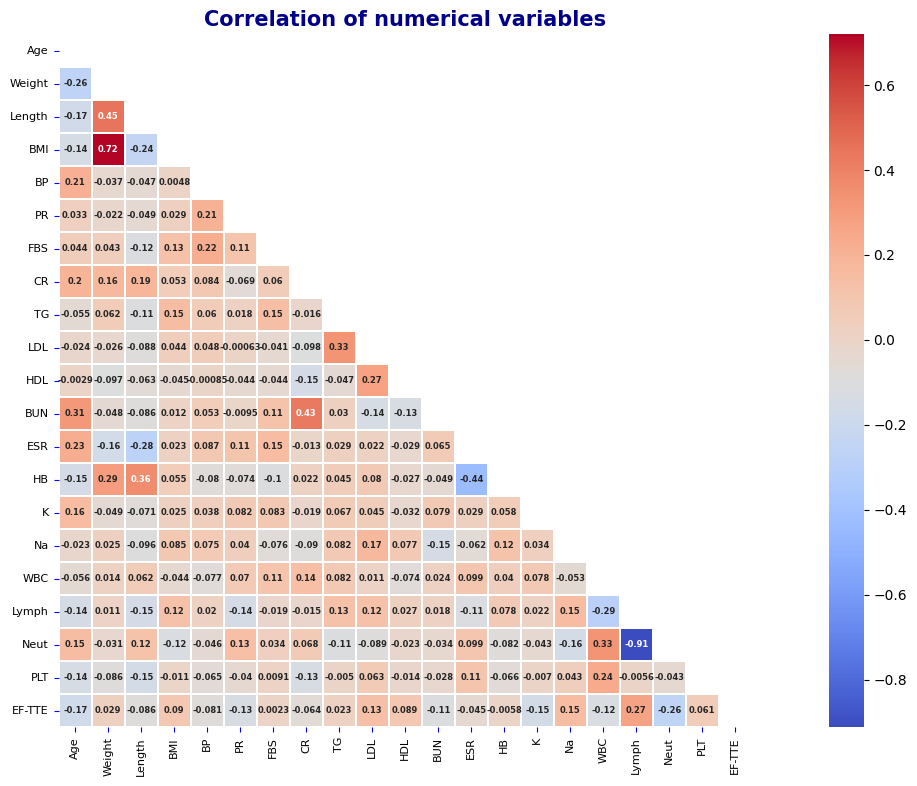

In [28]:

# Spearman korelasyonu hesapla
corr_matrix = datafm[num_cols].corr(method='spearman')

# Üst üçgeni maskele
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Görselleştirme
fig, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr_matrix,
            mask=mask,
            square=True,
            annot=True,
            ax=ax,
            linewidths=0.2,
            annot_kws={'size': 6, 'fontweight': 'bold'},
            cmap='coolwarm')
ax.tick_params(labelsize=8, color='blue', labelcolor='black')
ax.set_title('Correlation of numerical variables', fontsize=15, fontweight='bold', color='darkblue')
plt.show()


Korelassyon matrisi Sayısal değişkenler arasındaki ilişkileri  göstererek hangi değişkenlerin birbirleri ile  yakın bir ilişki içinde veya bağımsız olduğunu analiz etmemizi sağlar.

MODEL GELİŞTİRME

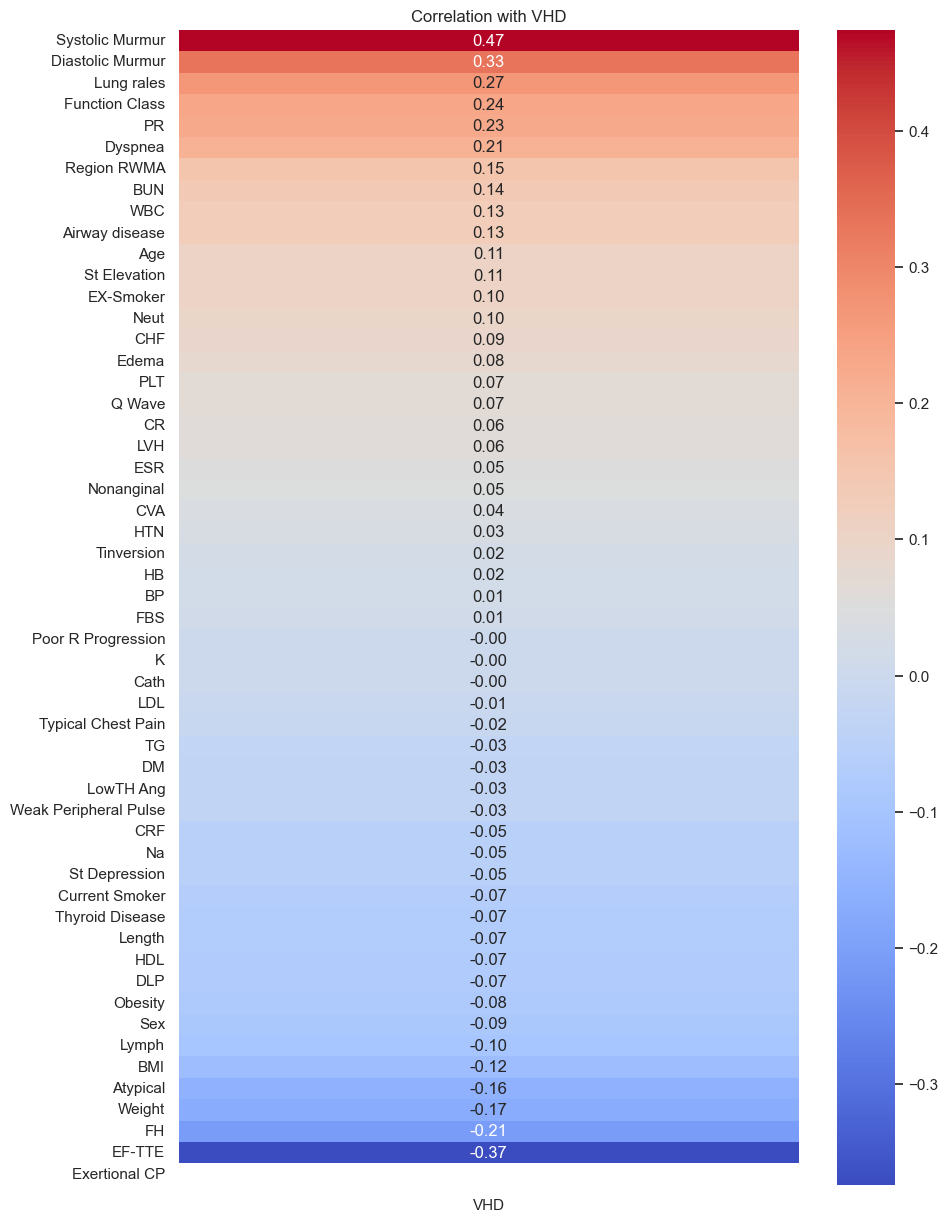

In [29]:
corr = datafm.corr()
target_corr = corr['VHD'].drop('VHD')

target_corr_sorted = target_corr.sort_values(ascending=False)

plt.figure(figsize=(10,15))
sns.set(font_scale=1.0)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title("Correlation with VHD")
plt.show()


VHD sütunu ile diğer sayısal değişkenler arasındaki korelasyonları görselleştirir.Bu görselleştirme sayesinde VHD ile en güçlü ilişkiye sahip değişkenler en üstte yer alır ve görselleştirilen harita sayesinde korelasyonların büyüklüğü  net bir şekilde görülür.

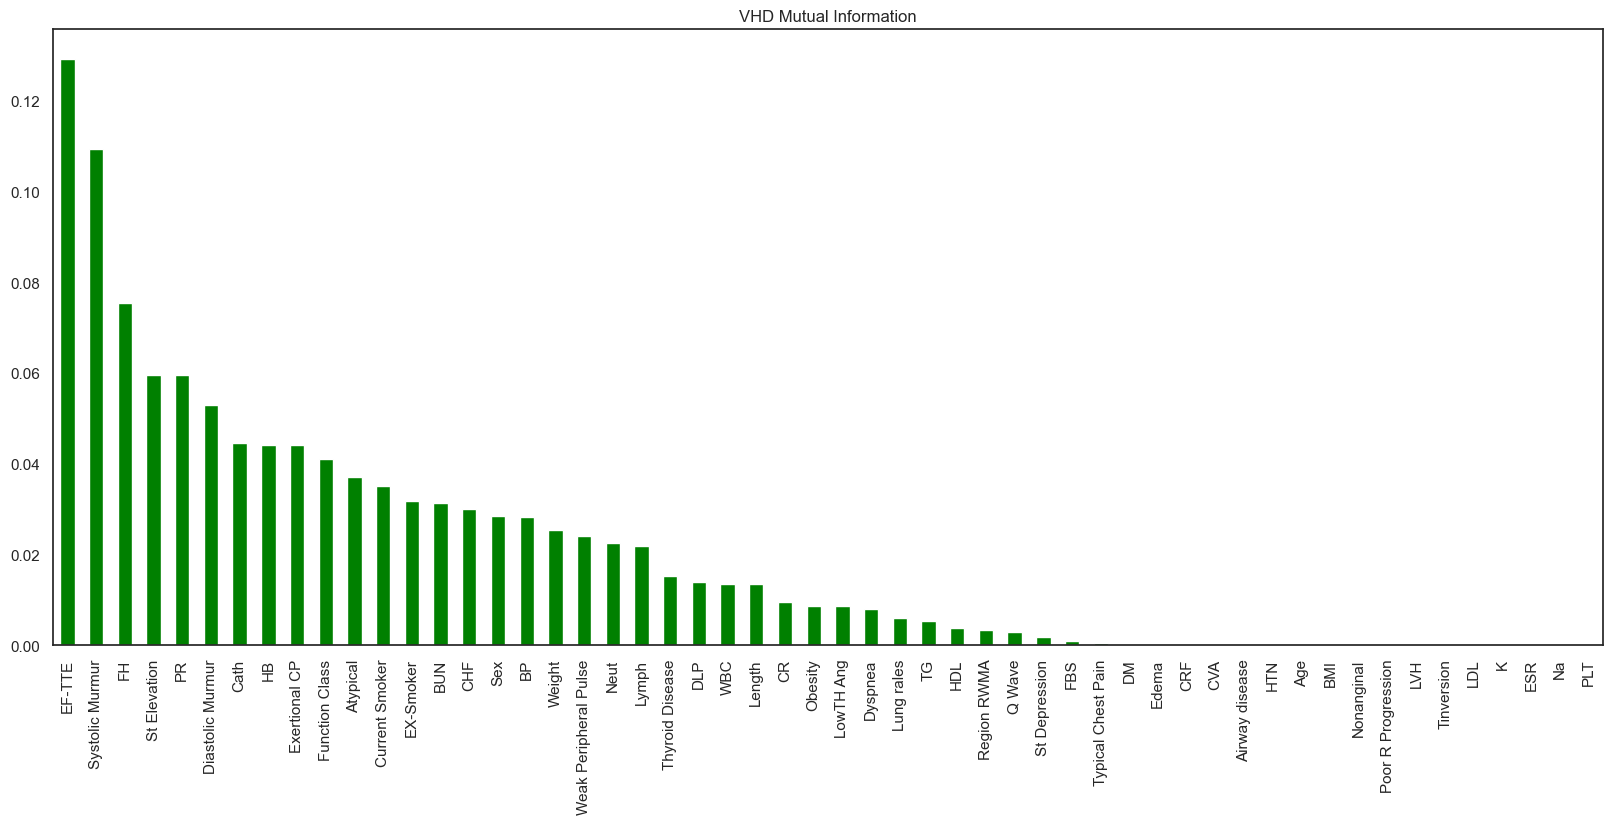

In [30]:
from sklearn.feature_selection import mutual_info_classif

# 'mutual_info_classif' fonksiyonu ile her bir özelliğin hedef değişkenle (VHD) olan karşılıklı bilgisini hesaplıyoruz
mutual_info = mutual_info_classif(datafm.drop(['VHD'], axis=1), datafm['VHD'], random_state=42)
mutual_info = pd.Series(mutual_info)
mutual_info.index = datafm.drop(['VHD'], axis=1).columns
columns = mutual_info.sort_values(ascending=False)
columns.plot.bar(title='VHD Mutual Information', figsize=(20, 8), color="green")
plt.show()


Mutual information veri kümesindeki her bir özelliğin hedef değişken (VHD) ile olan ilişkisini analiz eder ve sonuçları bir çubuk grafik ile görselleştirir. 

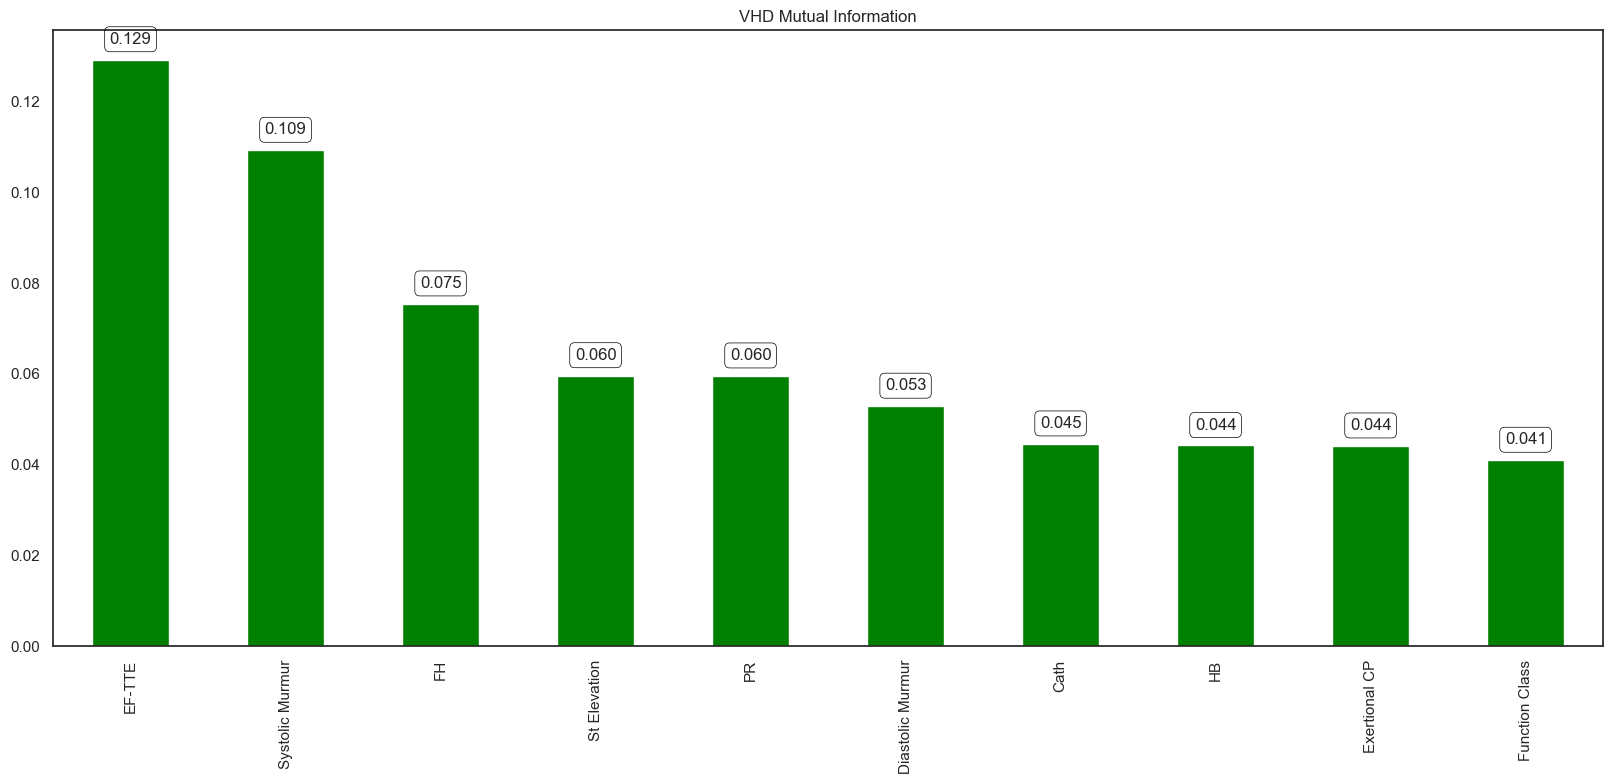

In [31]:
# VHD için en yüksek 10 karşılıklı bilgi değerini seçiyoruz
columns = mutual_info.sort_values(ascending=False)[:10]

ax = columns.plot.bar(title='VHD Mutual Information', figsize=(20, 8), color="green")
for rect in ax.patches:
    height = rect.get_height() 
   
    ax.text(rect.get_x() + rect.get_width() / 2., height + 0.0035, 
            "{:1.3f}".format(height), ha='center', 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

plt.show()



VHD hedef değişkeni için en yüksek 10 karşılıklı bilgi değerine sahip olan özellikleri seçer ve bu değerleri bir çubuk grafik (bar plot) ile görselleştirir. 

In [32]:

selected_features = columns.index.tolist()
print(selected_features)

['EF-TTE', 'Systolic Murmur', 'FH', 'St Elevation', 'PR', 'Diastolic Murmur', 'Cath', 'HB', 'Exertional CP', 'Function Class']


Seçilen özelliklerin isimleri yazdırılır.

In [33]:
data = datafm[['EF-TTE', 'Systolic Murmur', 'FH', 'St Elevation', 'PR', 'Diastolic Murmur', 'Cath', 'HB', 'Exertional CP', 'Function Class','VHD']]

datafm veri setinden yalnızca seçilen sütunlar ile yeni bir veri çerçevesi (data) oluşturulur.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('VHD', axis = 1)
y = data['VHD']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train),columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_test.columns)

Bu kod, veri setini eğitim ve test kümelerine ayırarak (train_test_split) modelin eğitilmesini sağlar. StandardScaler ile veriler standartlaştırılır böylece her özellik sıfır ortalama ve birim varyansla ölçeklenir. Eğitim verisi (X_train) fit edilip dönüştürülürken test verisi (X_test) yalnızca dönüştürülür. Sonuçta eğitim ve test verileri standartlaştırılmış şekilde (X_train_sc, X_test_sc) elde edilir böylece modelin eğitimine başlanılır.

In [35]:
from imblearn.over_sampling import SMOTENC

catord_cols = ['Systolic Murmur', 'FH', 'St Elevation', 'Diastolic Murmur', 'Cath', 'Exertional CP', 'Function Class']
oversample = SMOTENC(random_state=42, categorical_features=catord_cols)
print("Original Train Data : ", X_train_sc.shape, y_train.shape)

X_smote, y_smote = oversample.fit_resample(X_train_sc, y_train)
print("Smote Train Data : ", X_smote.shape, y_smote.shape)


Original Train Data :  (242, 10) (242,)
Smote Train Data :  (468, 10) (468,)


Bu kod, SMOTE kullanarak eğitim verisindeki sınıf dengesizliğini giderir. SMOTENC hem sayısal hem de kategorik özellikleri dikkate alarak azınlık sınıfını sentetik olarak çoğaltır. İlk başta orijinal veri boyutları yazdırılır sonra SMOTE uygulanarak dengelenmiş verinin boyutları gösterilir.

In [36]:
y_smote.value_counts()

VHD
1    117
0    117
2    117
3    117
Name: count, dtype: int64

y_smote.value_counts() komutu SMOTE uygulanmış olan hedef değişken y_smote'in her bir sınıfının kaç kez tekrarlandığını gösterir. 

In [52]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score
skf = StratifiedKFold(n_splits = 5,
                      shuffle = True,
                      random_state = 123)

Bu kod, StratifiedKFold ile 5 katmanlı çapraz doğrulama oluşturur. Veriyi karıştırarak her katmanda hedef değişkenin sınıf dağılımını korur. Bu, özellikle dengesiz veri setlerinde önemlidir.

1-Logistic Regression

Logistic Regresyon Doğruluk Skoru: 0.62295

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.59      0.76      0.67        25
           1       0.76      0.50      0.60        32
           2       0.43      1.00      0.60         3
           3       0.00      0.00      0.00         1

    accuracy                           0.62        61
   macro avg       0.45      0.56      0.47        61
weighted avg       0.66      0.62      0.62        61



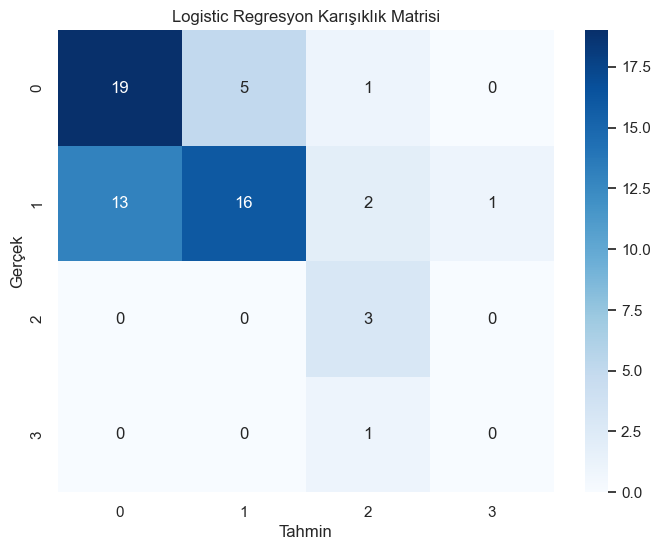

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lr = GridSearchCV(LogisticRegression(penalty='l2', random_state=123), param_grid, cv=skf, scoring='accuracy')
lr.fit(X_smote, y_smote)
predict_lr = lr.predict(X_test_sc)
accuracy_lg = accuracy_score(y_test, predict_lr)
print(f"Logistic Regresyon Doğruluk Skoru: {accuracy_lg:.5f}")
print("\nSınıflandırma Raporu:")
report = classification_report(y_test, predict_lr, zero_division=0)
print(report)
conf_matrix = confusion_matrix(y_test, predict_lr)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Logistic Regresyon Karışıklık Matrisi')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()



Bu kodda, Logistic Regression modeli GridSearchCV ile optimize edilir. Farklı düzenleme parametreleri (C değerleri) kullanılarak en iyi model seçilir ve 5 katmanlı çapraz doğrulama ile değerlendirme yapılır. Modelin doğruluk skoru hesaplanır ardından Sınıflandırma Raporu ve Karışıklık Matrisi görselleştirilir. Karışıklık matrisi, modelin doğru ve yanlış sınıflandırmalarını gösteren bir ısı haritası olarak sunulur.

2- SVC

Support Vector Classifier Doğruluk Skoru: 0.54098

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        25
           1       0.59      0.50      0.54        32
           2       0.50      0.67      0.57         3
           3       0.00      0.00      0.00         1

    accuracy                           0.54        61
   macro avg       0.40      0.44      0.41        61
weighted avg       0.54      0.54      0.54        61



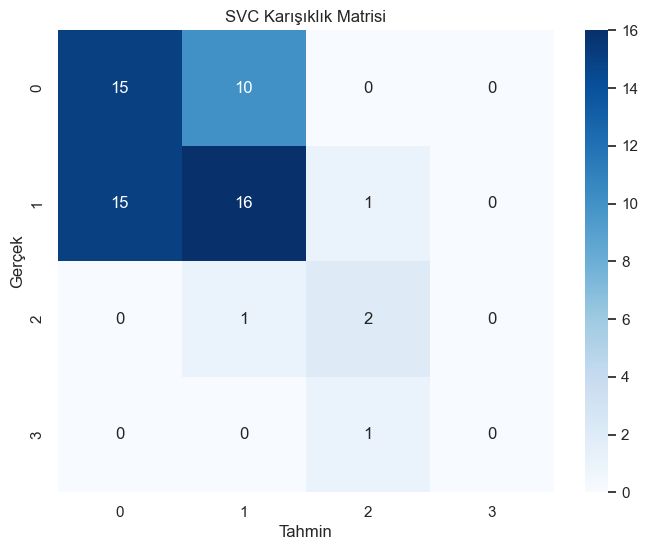

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': ['scale', 'auto']}

svc = SVC(random_state=123)
svc_grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')  # cv=5 ile çapraz doğrulama
svc_grid.fit(X_smote, y_smote)
predict_svc = svc_grid.predict(X_test_sc)
accuracy_svc = accuracy_score(y_test, predict_svc)
print(f"Support Vector Classifier Doğruluk Skoru: {accuracy_svc:.5f}")
print("\nSınıflandırma Raporu:")
report = classification_report(y_test, predict_svc, zero_division=0)
print(report)
conf_matrix = confusion_matrix(y_test, predict_svc)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('SVC Karışıklık Matrisi')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()



Bu kodda, Support Vector Classifier (SVC) modelinin performansı optimize edilir.GridSearchCV ile hiperparametreler (C ve gamma) için en iyi değerler aranır ve model 5 katlı çapraz doğrulama ile eğitilir. En iyi modelin doğruluk skoru hesaplanır ardından sınıflandırma raporu ve karışıklık matrisi görselleştirilir. Karışıklık matrisi, modelin doğru ve yanlış sınıflandırmalarını gösteren bir ısı haritası olarak sunulur.

3- Decision Tree

Karar Ağacı Doğruluk Skoru: 0.62295

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69        25
           1       0.77      0.53      0.63        32
           2       0.27      1.00      0.43         3
           3       0.00      0.00      0.00         1

    accuracy                           0.62        61
   macro avg       0.43      0.56      0.44        61
weighted avg       0.69      0.62      0.64        61



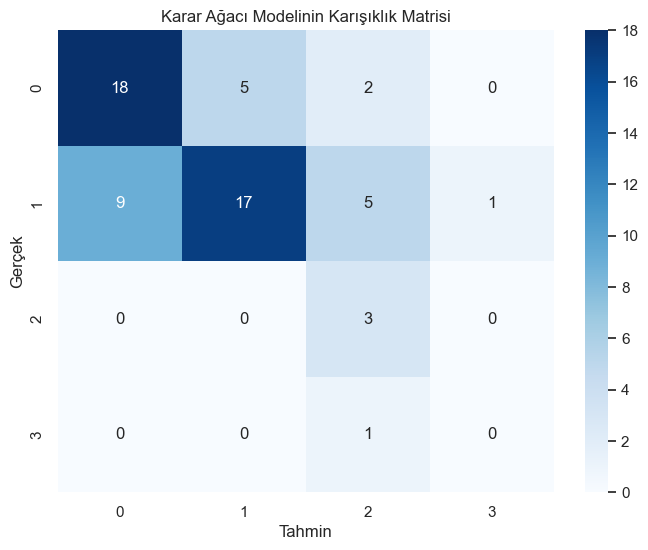

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier(random_state=123)

# Karar Ağacı için parametre aralığı
param_grid = {
    'criterion': ['gini', 'entropy'],  # Gini veya Entropy
    'max_depth': [3, 5, 10, 15, 20, None],  # Farklı derinlikler
    'min_samples_split': [2, 5, 10],  # Minumum örnek sayısı (bölme)
    'min_samples_leaf': [1, 2, 5],  # Minumum örnek sayısı (yaprak)
    'max_features': [None, 'sqrt', 'log2']  # Özellik seçimi
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search_dt.fit(X_smote, y_smote)
best_dt = grid_search_dt.best_estimator_
predict_dt = best_dt.predict(X_test_sc)
accuracy_best_dt = accuracy_score(y_test, predict_dt)
print(f"Karar Ağacı Doğruluk Skoru: {accuracy_best_dt:.5f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, predict_dt, zero_division=0))
conf_matrix_best_dt = confusion_matrix(y_test, predict_dt)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_best_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Karar Ağacı Modelinin Karışıklık Matrisi')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()


Bu kodda, Karar Ağacı (Decision Tree) sınıflandırıcısı kullanılarak modelin performansı optimize edilir. GridSearchCV ile hiperparametreler (örneğin, criterion, max_depth, min_samples_split, min_samples_leaf, max_features) için en iyi kombinasyon aranır ve model 5 katlı çapraz doğrulama ile eğitilir. En iyi modelle test verisi üzerinde tahmin yapılır. Ardından modelin doğruluk skoru hesaplanır sınıflandırma raporu ve karışıklık matrisi (ısı haritası şeklinde) görselleştirilir. Karışıklık matrisi, modelin doğru ve yanlış sınıflandırmalarını görsel olarak gösterir.

4-Random Forest

 Random Forest Doğruluk Skoru: 0.70492
 Sınıflandırma Raporu
              precision    recall  f1-score   support

           0       0.73      0.64      0.68        25
           1       0.75      0.75      0.75        32
           2       0.60      1.00      0.75         3
           3       0.00      0.00      0.00         1

    accuracy                           0.70        61
   macro avg       0.52      0.60      0.55        61
weighted avg       0.72      0.70      0.71        61



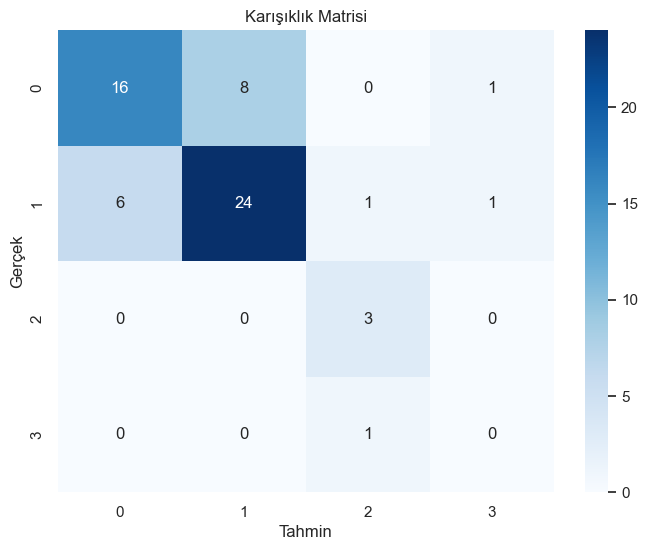

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, max_depth=30,random_state=42)

rfc.fit(X_smote,y_smote)
predict_rf = rfc.predict(X_test_sc)
accuracy_rf = accuracy_score(y_test, predict_rf)
print(f" Random Forest Doğruluk Skoru: {accuracy_rf:.5f}")
print(f" Sınıflandırma Raporu")
report = print(classification_report(y_test, predict_rf, zero_division=0))
report

conf_matrix = confusion_matrix(y_test, predict_rf)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()




Bu kodda, Random Forest sınıflandırıcısı kullanılarak model eğitilir. n_estimators=200 ile 200 ağaç, max_depth=30 ile her ağacın derinliği 30 olarak belirlenir. Model, SMOTE ile dengelenmiş eğitim verisi (X_smote, y_smote) üzerinde eğitildikten sonra, test verisi (X_test_sc) üzerinde tahmin yapılır.

5-Naive Bayes

Naive Bayes Doğruluk Skoru: 0.40984

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.51      0.76      0.61        25
           1       0.75      0.09      0.17        32
           2       0.16      1.00      0.27         3
           3       0.00      0.00      0.00         1

    accuracy                           0.41        61
   macro avg       0.36      0.46      0.26        61
weighted avg       0.61      0.41      0.35        61



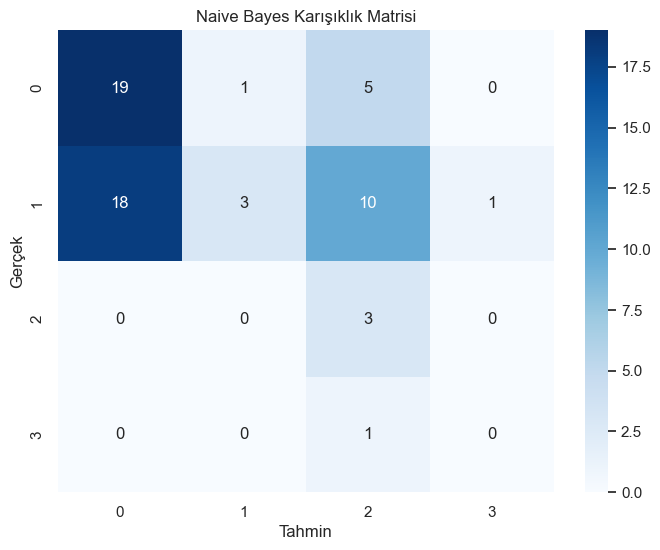

In [57]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Naive Bayes için genellikle kullanılan smoothing parametresi
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy',verbose=0)
grid_search.fit(X_smote, y_smote)
best_nv = grid_search.best_estimator_
predict_nb = grid_search.predict(X_test_sc)
accuracy_nv = accuracy_score(y_test, predict_nb)
print(f"Naive Bayes Doğruluk Skoru: {accuracy_nv:.5f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, predict_nb, zero_division=0))
conf_matrix = confusion_matrix(y_test, predict_nb)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Naive Bayes Karışıklık Matrisi')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()


Bu kodda, Naive Bayes (GaussianNB) sınıflandırıcısı kullanılarak modelin performansı optimize edilir. GridSearchCV ile hiperparametreler (örneğin, var_smoothing) için en iyi kombinasyon aranır ve model 5 katlı çapraz doğrulama ile eğitilir. En iyi modelle test verisi üzerinde tahmin yapılır. Ardından, modelin doğruluk skoru hesaplanır sınıflandırma raporu yazdırılır ve karışıklık matrisi (ısı haritası şeklinde) görselleştirilir. Karışıklık matrisi, modelin doğru ve yanlış sınıflandırmalarını görsel olarak gösterir.

6-KNN

KNN Doğruluk Skoru: 0.62295

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.58      0.72      0.64        25
           1       0.71      0.53      0.61        32
           2       0.60      1.00      0.75         3
           3       0.00      0.00      0.00         1

    accuracy                           0.62        61
   macro avg       0.47      0.56      0.50        61
weighted avg       0.64      0.62      0.62        61



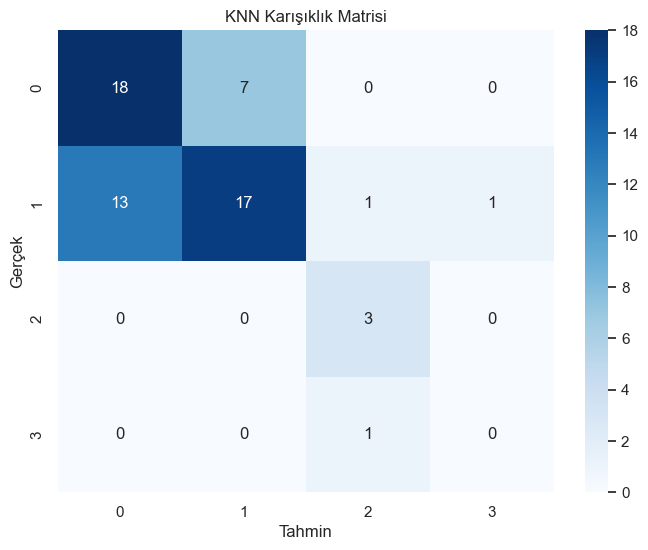

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


knn = KNeighborsClassifier(metric='euclidean') 

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],         # En yakın komşu sayısı
    'weights': ['uniform', 'distance'],      # Komşu ağırlıkları
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Mesafe hesaplama algoritması
    'p': [2]                                 # L2 normu (Euclidean mesafesi için)
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_smote, y_smote)
predict_knn = grid_search.predict(X_test_sc)
accuracy_knn = accuracy_score(y_test, predict_knn)
print(f"KNN Doğruluk Skoru: {accuracy_knn:.5f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, predict_knn, zero_division=0))
conf_matrix = confusion_matrix(y_test, predict_knn)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('KNN Karışıklık Matrisi')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()




Bu kodda, K-Nearest Neighbors (KNN) sınıflandırıcısı kullanılarak modelin performansı optimize edilir. GridSearchCV ile hiperparametreler (örneğin, n_neighbors, weights, algorithm, p) için en iyi kombinasyon aranır ve model 5 katlı çapraz doğrulama ile eğitilir. En iyi modelle test verisi üzerinde tahmin yapılır. Ardından modelin doğruluk skoru hesaplanır, sınıflandırma raporu yazdırılır ve karışıklık matrisi (ısı haritası şeklinde) görselleştirilir. Karışıklık matrisi, modelin doğru ve yanlış sınıflandırmalarını görsel olarak gösterir.

Özelleştirilen KNN ve SVM İle Çalışma

1-Özel Mesafe Metriği ile KNN

KNN Doğruluk Skoru: 0.63934

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        25
           1       0.71      0.62      0.67        32
           2       0.60      1.00      0.75         3
           3       0.00      0.00      0.00         1

    accuracy                           0.64        61
   macro avg       0.49      0.57      0.51        61
weighted avg       0.67      0.64      0.65        61



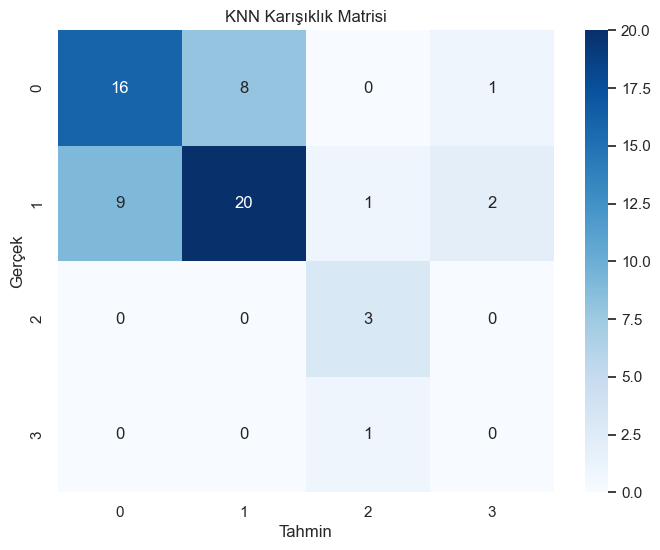

In [60]:

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # En yakın komşu sayısı
    'weights': ['uniform', 'distance'],  # Komşu ağırlıkları
    'algorithm': ['brute'],  # Mesafe hesaplama algoritması
    'metric': ['cosine'],  # Yalnızca Kosinüs benzerliği
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_smote, y_smote)
predict_knn_opt = grid_search.predict(X_test_sc)
accuracy_knn_opt = accuracy_score(y_test, predict_knn_opt)
print(f"KNN Doğruluk Skoru: {accuracy_knn_opt:.5f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, predict_knn_opt, zero_division=0))
conf_matrix = confusion_matrix(y_test, predict_knn_opt)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('KNN Karışıklık Matrisi')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()


Bu kodda, K-Nearest Neighbors (KNN) sınıflandırıcısında mesafe metriği olarak Cosine kullanılarak modelin performansı optimize edilir. GridSearchCV ile hiperparametreler için en iyi kombinasyon aranır ve model 5 katlı çapraz doğrulama ile eğitilir. En iyi modelle test verisi üzerinde tahmin yapılır. Ardından modelin doğruluk skoru hesaplanır, sınıflandırma raporu yazdırılır ve karışıklık matrisi (ısı haritası şeklinde) görselleştirilir. Karışıklık matrisi, modelin doğru ve yanlış sınıflandırmalarını görsel olarak gösterir.

Özel Çekirdek İle SVC

Support Vector Classifier Doğruluk Skoru: 0.65574

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.61      0.80      0.69        25
           1       0.81      0.53      0.64        32
           2       0.50      1.00      0.67         3
           3       0.00      0.00      0.00         1

    accuracy                           0.66        61
   macro avg       0.48      0.58      0.50        61
weighted avg       0.70      0.66      0.65        61



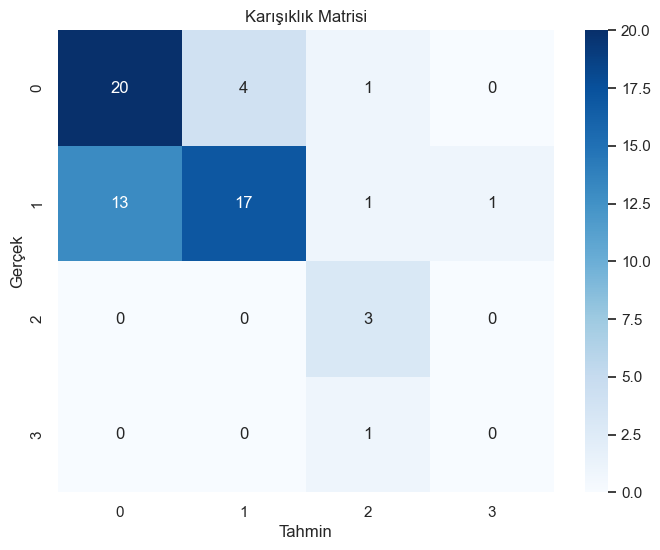

In [61]:

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'rbf'], 
              'gamma': ['scale', 'auto']}

svc = SVC(random_state=123)
svc_grid = GridSearchCV(svc, param_grid, cv=skf, scoring='accuracy')
svc_grid.fit(X_smote, y_smote)
predict_svc_opt = svc_grid.predict(X_test_sc)
accuracy_svc_opt = accuracy_score(y_test, predict_svc_opt)
print(f"Support Vector Classifier Doğruluk Skoru: {accuracy_svc_opt:.5f}")
print("\nSınıflandırma Raporu:")
report = classification_report(y_test, predict_svc_opt, zero_division=0)
print(report)
conf_matrix = confusion_matrix(y_test, predict_svc_opt)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()


Bu kodda, Support Vector Classifier (SVC) modelinin performansı özel çekirdek ile  optimize edilir.GridSearchCV ile hiperparametreler (C ve gamma) için en iyi değerler aranır ve model 5 katlı çapraz doğrulama ile eğitilir. En iyi modelin doğruluk skoru hesaplanır ardından sınıflandırma raporu ve karışıklık matrisi görselleştirilir. Karışıklık matrisi, modelin doğru ve yanlış sınıflandırmalarını gösteren bir ısı haritası olarak sunulur.

Sıralı Doğruluk Skorları:
                  Model  Accuracy
3        Random Forest  0.704918
7  Özelleştirilmiş SVC  0.655738
6  Özelleştirilmiş KNN  0.639344
0  Logistic Regression  0.622951
5                  KNN  0.622951
2        Decision Tree  0.622951
1                  SVC  0.540984
4          Naive Bayes  0.409836

En İyi Model:
Model       Random Forest
Accuracy         0.704918
Name: 3, dtype: object


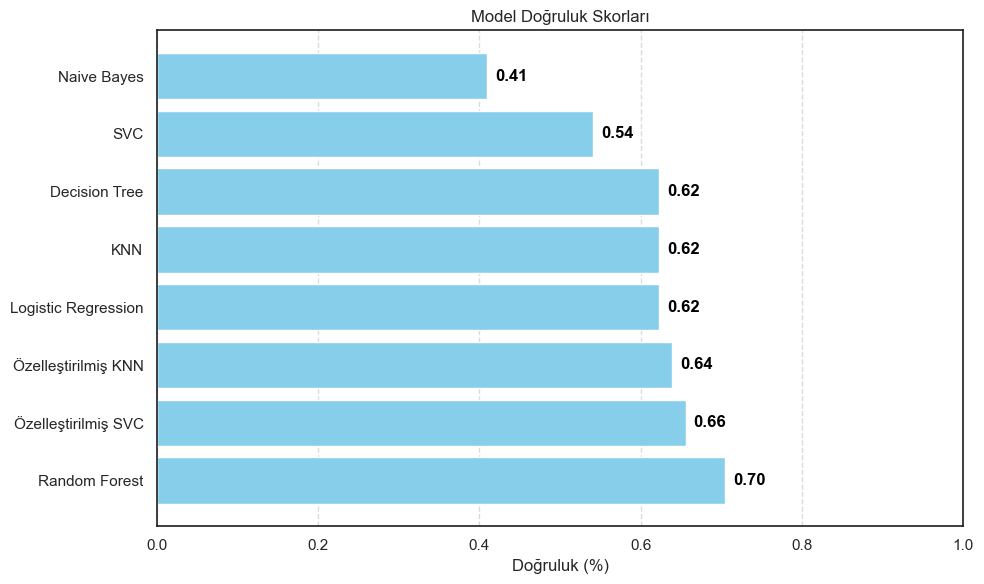

In [62]:

accuracy_scores = {
    'Model': ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN','Özelleştirilmiş KNN','Özelleştirilmiş SVC'],
    'Accuracy': [accuracy_lg, accuracy_svc, accuracy_best_dt, accuracy_rf, accuracy_nv, accuracy_knn, accuracy_knn_opt,accuracy_svc_opt]  # Bu değişkenlerin değerlerini kontrol edin
}
accuracy_df = pd.DataFrame(accuracy_scores)
sorted_accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
best_model = sorted_accuracy_df.iloc[0]
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_accuracy_df['Model'], sorted_accuracy_df['Accuracy'], color='skyblue')
plt.xlabel('Doğruluk (%)')
plt.title('Model Doğruluk Skorları')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', 
             va='center', ha='left', color='black', fontweight='bold')

print("Sıralı Doğruluk Skorları:\n", sorted_accuracy_df)
print("\nEn İyi Model:")
print(best_model)

# Sonuçları gösterme
plt.tight_layout() 
plt.show()




Tüm modellerin doğruluk skorları sıralanır en iyi model belirlenir ve bar grafiği ile görselleştirilir. En İyi Model ve sıralı doğruluk skorları konsola yazdırılır.

In [63]:

from sklearn.metrics import f1_score, precision_score, recall_score


models = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN', 'Özelleştirilmiş KNN', 'Özelleştirilmiş SVC']
accuracy_scores = [accuracy_lg, accuracy_svc, accuracy_best_dt, accuracy_rf, accuracy_nv, accuracy_knn, accuracy_knn_opt, accuracy_svc_opt]
y_preds = [predict_lr, predict_svc, predict_dt, predict_rf, predict_nb, predict_knn, predict_knn_opt, predict_svc_opt]  # Her modelin tahmin sonuçları

y_test_list = [y_test] * len(models) 

# Performans metriklerini hesaplamak
metrics = []
for i in range(len(models)):
    y_true = y_test_list[i] 
    y_pred = y_preds[i]
    
  
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    if len(conf_matrix) == 2:
        tn, fp, fn, tp = conf_matrix.ravel()
        # Performans Metrikleri
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='binary', zero_division=0)
        recall = recall_score(y_true, y_pred, average='binary', zero_division=0)
        f1 = f1_score(y_true, y_pred, average='binary', zero_division=0)
        
        # Özgüllük (Specificity) ve Duyarlılık (Sensitivity)
        sensitivity = recall
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    else:
        # Çoklu sınıflama için (multi-class classification)
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
        recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
        
        # Duyarlılık ve Özgüllük 
        sensitivity = recall  
        specificity = precision 

    
    metrics.append([accuracy, tn if len(conf_matrix) == 2 else None, fp if len(conf_matrix) == 2 else None, 
                   fn if len(conf_matrix) == 2 else None, tp if len(conf_matrix) == 2 else None, 
                   sensitivity, specificity, precision, f1])

metrics_df = pd.DataFrame(metrics, columns=['Doğruluk', 'DN', 'YP', 'YN', 'DP', 'Duyarlılık', 'Özgüllük', 'Kesinlik', 'F1 Ölçütü'], index=models)

print("Model Performans Karşılaştırması:")
print(metrics_df)


Model Performans Karşılaştırması:
                     Doğruluk    DN    YP    YN    DP  Duyarlılık  Özgüllük  \
Logistic Regression  0.622951  None  None  None  None    0.565000  0.446057   
SVC                  0.540984  None  None  None  None    0.441667  0.398148   
Decision Tree        0.622951  None  None  None  None    0.562812  0.428030   
Random Forest        0.704918  None  None  None  None    0.597500  0.519318   
Naive Bayes          0.409836  None  None  None  None    0.463438  0.355352   
KNN                  0.622951  None  None  None  None    0.562812  0.472245   
Özelleştirilmiş KNN  0.639344  None  None  None  None    0.566250  0.488571   
Özelleştirilmiş SVC  0.655738  None  None  None  None    0.582812  0.478896   

                     Kesinlik  F1 Ölçütü  
Logistic Regression  0.446057   0.467610  
SVC                  0.398148   0.414814  
Decision Tree        0.428030   0.437627  
Random Forest        0.519318   0.545213  
Naive Bayes          0.355352   0.26307

Her  modelin doğruluk, kesinlik, duyarlılık, özgüllük ve F1 skoru gibi performans metriklerini bir tablo halinde sunar. Bu şekilde, farklı modellerin performansını daha kolay karşılaştırabiliriz.